In [1]:
import sys; sys.path.append("..")
from evaldets.results import *
from evaldets.postprocess import *

In [2]:
i18n = {"quality": "Q"}
c = 0
s = GrandSummary('../detectron2/data/', model_is_basename=True)
plt.rc("font", size=11)

In [3]:
from IPython.display import display, HTML

def pretty_print(df):
    return display(HTML(df.to_html().replace("\\n","<br>")))

def compare3(s, m1, m2, m3, m='PPV'):
    return pretty_print(pd.DataFrame({
        lhs: {
            rhs: None if lhs == rhs else f"{lhs} over {rhs}:\n{s.better_PRF1(lhs, rhs, m)}" for rhs in (m1, m2, m3)
        }
        for lhs in (m1, m2, m3)
    }))

#  PPV -- trained

Saved 15-trained-AP-curves-PPV-Q.png


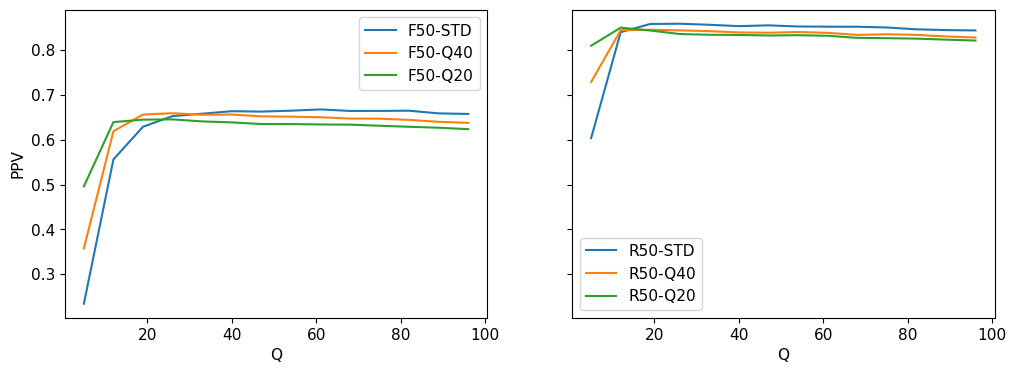

In [4]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
for ax, m in zip(axes, "FR"):
    for model in (f"{m}50-STD", f"{m}50-Q40", f"{m}50-Q20"):
        s.plot_PRF1(model, "PPV", 0.5, ax=ax, i18n=i18n)
save_plot(fig, "15-trained-AP-curves-PPV-Q", c=c)

In [5]:
for m in "RF":
    compare3(s, f"{m}50-STD", f"{m}50-Q20", f"{m}50-Q40")

,R50-STD,R50-Q20,R50-Q40
R50-STD,None,R50-Q20 over R50-STD: PPV advantagequality 5 0.809797 0.20614312 0.850184 0.010065,R50-Q40 over R50-STD: PPV advantagequality 5 0.728826 0.12517212 0.844497 0.004379
R50-Q20,R50-STD over R50-Q20: PPV advantagequality 19 0.858411 0.01460026 0.858956 0.02299533 0.856602 0.02232740 0.853576 0.01961247 0.855301 0.02259354 0.852794 0.01944261 0.852345 0.02027068 0.852173 0.02473975 0.850600 0.02392782 0.846501 0.02082689 0.844701 0.02126696 0.843998 0.022605,None,R50-Q40 over R50-Q20: PPV advantagequality 19 0.845447 0.00163626 0.844078 0.00811733 0.842405 0.00813040 0.839528 0.00556447 0.838843 0.00613554 0.840490 0.00713861 0.838584 0.00650968 0.833991 0.00655775 0.835444 0.00877182 0.834029 0.00835489 0.830511 0.00707696 0.828225 0.006832
R50-Q40,R50-STD over R50-Q40: PPV advantagequality 19 0.858411 0.01296426 0.858956 0.01487833 0.856602 0.01419740 0.853576 0.01404847 0.855301 0.01645854 0.852794 0.01230461 0.852345 0.01376168 0.852173 0.01818275 0.850600 0.01515682 0.846501 0.01247289 0.844701 0.01419096 0.843998 0.015773,R50-Q20 over R50-Q40: PPV advantagequality 5 0.809797 0.08097012 0.850184 0.005687,None


,F50-STD,F50-Q20,F50-Q40
F50-STD,None,F50-Q20 over F50-STD: PPV advantagequality 5 0.495858 0.26192912 0.639395 0.08337619 0.644836 0.015840,F50-Q40 over F50-STD: PPV advantagequality 5 0.357418 0.12349012 0.619041 0.06302319 0.656275 0.02727926 0.659176 0.006417
F50-Q20,F50-STD over F50-Q20: PPV advantagequality 26 0.652759 0.00734733 0.658081 0.01718840 0.663678 0.02493347 0.662836 0.02783254 0.664794 0.02980861 0.667685 0.03358868 0.664283 0.03060375 0.664345 0.03306982 0.664802 0.03587489 0.658829 0.03200296 0.657559 0.033991,None,F50-Q40 over F50-Q20: PPV advantagequality 19 0.656275 0.01143926 0.659176 0.01376433 0.655730 0.01483740 0.656231 0.01748647 0.652215 0.01721154 0.651449 0.01646361 0.650230 0.01613368 0.647240 0.01356075 0.646996 0.01572082 0.644267 0.01533989 0.639958 0.01313096 0.637630 0.014061
F50-Q40,F50-STD over F50-Q40: PPV advantagequality 33 0.658081 0.00235140 0.663678 0.00744647 0.662836 0.01062154 0.664794 0.01334561 0.667685 0.01745568 0.664283 0.01704375 0.664345 0.01734982 0.664802 0.02053589 0.658829 0.01887196 0.657559 0.019930,F50-Q20 over F50-Q40: PPV advantagequality 5 0.495858 0.13844012 0.639395 0.020353,None


#  PPV -- fine-tuned

Saved 15-trained-AP-curves-PPV-T.png


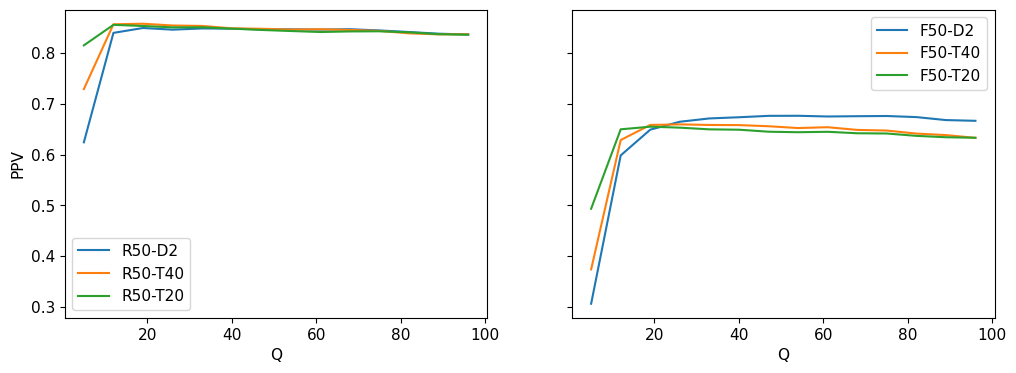

In [6]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
for ax, m in zip(axes, "RF"):
    for model in (f"{m}50-D2", f"{m}50-T40", f"{m}50-T20"):
        s.plot_PRF1(model, "PPV", 0.5, ax=ax, i18n=i18n)
save_plot(fig, "15-trained-AP-curves-PPV-T", c=c)

In [7]:
for m in "RF":
    compare3(s, f"{m}50-D2", f"{m}50-T20", f"{m}50-T40")

,R50-D2,R50-T20,R50-T40
R50-D2,None,R50-T20 over R50-D2: PPV advantagequality 5 0.815164 0.19104612 0.855556 0.01584119 0.853299 0.00395026 0.850598 0.00455533 0.850735 0.00227640 0.848097 0.000074,R50-T40 over R50-D2: PPV advantagequality 5 0.729025 0.10490712 0.856649 0.01693419 0.857767 0.00841826 0.854283 0.00824033 0.853396 0.00493740 0.848645 0.00062247 0.847836 0.00102561 0.846868 0.00065996 0.837059 0.000543
R50-T20,R50-D2 over R50-T20: PPV advantagequality 47 0.846810 0.00130854 0.846800 0.00340561 0.846209 0.00477168 0.846940 0.00437475 0.844521 0.00170082 0.841396 0.00054489 0.838123 0.00098696 0.836516 0.000352,None,R50-T40 over R50-T20: PPV advantagequality 12 0.856649 0.00109319 0.857767 0.00446826 0.854283 0.00368533 0.853396 0.00266140 0.848645 0.00054847 0.847836 0.00233454 0.846179 0.00278461 0.846868 0.00543068 0.845469 0.00290475 0.843621 0.00079996 0.837059 0.000894
R50-T40,R50-D2 over R50-T40: PPV advantagequality 54 0.846800 0.00062168 0.846940 0.00147175 0.844521 0.00090182 0.841396 0.00255189 0.838123 0.001333,R50-T20 over R50-T40: PPV advantagequality 5 0.815164 0.08613982 0.840852 0.00200689 0.837137 0.000347,None


,F50-D2,F50-T20,F50-T40
F50-D2,None,F50-T20 over F50-D2: PPV advantagequality 5 0.493238 0.18720612 0.649693 0.05138519 0.654873 0.005863,F50-T40 over F50-D2: PPV advantagequality 5 0.373737 0.06770612 0.628573 0.03026419 0.658320 0.009310
F50-T20,F50-D2 over F50-T20: PPV advantagequality 26 0.664615 0.01163233 0.671147 0.02151940 0.673471 0.02454347 0.676233 0.03125454 0.676370 0.03239561 0.674974 0.03017068 0.675524 0.03359975 0.675916 0.03446382 0.673785 0.03698389 0.667909 0.03381996 0.666449 0.033376,None,F50-T40 over F50-T20: PPV advantagequality 19 0.658320 0.00344726 0.659420 0.00643833 0.658297 0.00866940 0.657993 0.00906547 0.655782 0.01080454 0.652182 0.00820861 0.653846 0.00904268 0.648556 0.00663175 0.647251 0.00579882 0.641313 0.00451189 0.638321 0.004231
F50-T40,F50-D2 over F50-T40: PPV advantagequality 26 0.664615 0.00519433 0.671147 0.01285040 0.673471 0.01547847 0.676233 0.02045154 0.676370 0.02418861 0.674974 0.02112868 0.675524 0.02696775 0.675916 0.02866582 0.673785 0.03247289 0.667909 0.02958896 0.666449 0.033585,F50-T20 over F50-T40: PPV advantagequality 5 0.493238 0.11950012 0.649693 0.02112196 0.633073 0.000209,None


# TPR -- trained

Saved 15-trained-AP-curves-TPR-Q.png


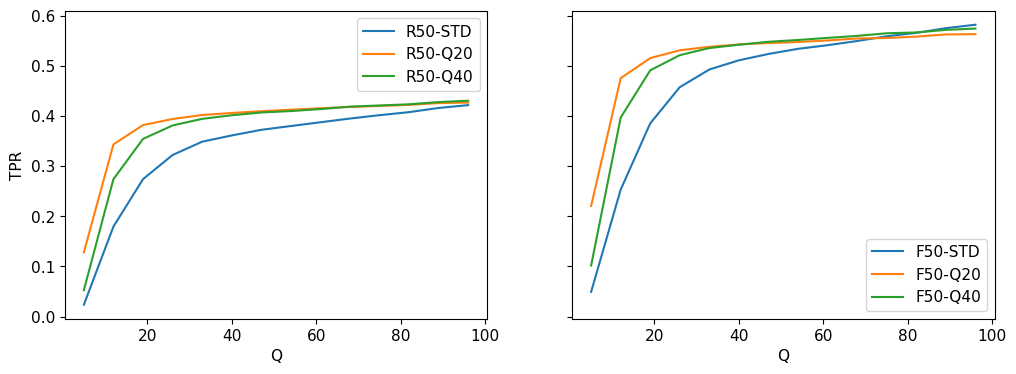

In [8]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
for ax, m in zip(axes, "RF"):
    for model in (f"{m}50-STD", f"{m}50-Q20", f"{m}50-Q40"):
        s.plot_PRF1(model, "TPR", 0.5, ax=ax, i18n=i18n)
save_plot(fig, "15-trained-AP-curves-TPR-Q", c=c)

In [9]:
for m in "RF":
    compare3(s, f"{m}50-STD", f"{m}50-Q20", f"{m}50-Q40", "TPR")

,R50-STD,R50-Q20,R50-Q40
R50-STD,None,R50-Q20 over R50-STD: TPR advantagequality 5 0.128306 0.10466512 0.343443 0.16397419 0.381973 0.10783026 0.394110 0.07180433 0.402202 0.05333740 0.406137 0.04483347 0.409605 0.03707254 0.412743 0.03264161 0.415522 0.02787968 0.418192 0.02314675 0.420173 0.01841282 0.422348 0.01453189 0.425870 0.00971596 0.426916 0.005092,R50-Q40 over R50-STD: TPR advantagequality 5 0.052814 0.02917312 0.274116 0.09464719 0.354397 0.08025326 0.381258 0.05895133 0.394413 0.04554840 0.401569 0.04026447 0.407128 0.03459554 0.409963 0.02986161 0.413926 0.02628368 0.418797 0.02375175 0.421137 0.01937582 0.423476 0.01566089 0.427907 0.01175296 0.430604 0.008779
R50-Q20,"R50-STD over R50-Q20:Empty DataFrameColumns: [TPR, advantage]Index: []",None,R50-Q40 over R50-Q20: TPR advantagequality 68 0.418797 0.00060575 0.421137 0.00096382 0.423476 0.00112889 0.427907 0.00203796 0.430604 0.003688
R50-Q40,"R50-STD over R50-Q40:Empty DataFrameColumns: [TPR, advantage]Index: []",R50-Q20 over R50-Q40: TPR advantagequality 5 0.128306 0.07549212 0.343443 0.06932719 0.381973 0.02757726 0.394110 0.01285333 0.402202 0.00778940 0.406137 0.00456947 0.409605 0.00247754 0.412743 0.00278061 0.415522 0.001596,None


,F50-STD,F50-Q20,F50-Q40
F50-STD,None,F50-Q20 over F50-STD: TPR advantagequality 5 0.220751 0.17137712 0.475547 0.22218219 0.515674 0.13012226 0.531251 0.07353833 0.538131 0.04519140 0.542920 0.03165047 0.545700 0.02179754 0.547764 0.01362361 0.550819 0.00946768 0.554782 0.005036,F50-Q40 over F50-STD: TPR advantagequality 5 0.101968 0.05259412 0.397083 0.14371819 0.491317 0.10576626 0.521536 0.06382333 0.535737 0.04279640 0.542287 0.03101747 0.548177 0.02427454 0.551782 0.01764161 0.555993 0.01464268 0.559956 0.01021175 0.565158 0.00594582 0.566781 0.000798
F50-Q20,F50-STD over F50-Q20: TPR advantagequality 75 0.559213 0.00349582 0.565983 0.00748689 0.575313 0.01252296 0.582221 0.018770,None,F50-Q40 over F50-Q20: TPR advantagequality 47 0.548177 0.00247754 0.551782 0.00401861 0.555993 0.00517468 0.559956 0.00517475 0.565158 0.00944082 0.566781 0.00828489 0.571955 0.00916596 0.574542 0.011091
F50-Q40,F50-STD over F50-Q40: TPR advantagequality 89 0.575313 0.00335896 0.582221 0.007679,F50-Q20 over F50-Q40: TPR advantagequality 5 0.220751 0.11878412 0.475547 0.07846419 0.515674 0.02435726 0.531251 0.00971533 0.538131 0.00239440 0.542920 0.000633,None


# TPR -- fine tuned

Saved 15-trained-AP-curves-TPR-T.png


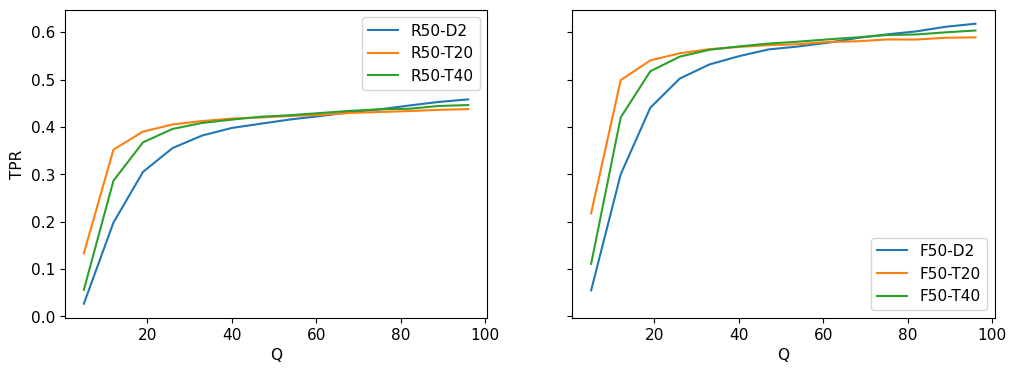

In [10]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
for ax, m in zip(axes, "RF"):
    for model in (f"{m}50-D2", f"{m}50-T20", f"{m}50-T40"):
        s.plot_PRF1(model, "TPR", 0.5, ax=ax, i18n=i18n)
save_plot(fig, "15-trained-AP-curves-TPR-T", c=c)

In [11]:
for m in "RF":
    compare3(s, f"{m}50-D2", f"{m}50-T20", f"{m}50-T40", "TPR")

,R50-D2,R50-T20,R50-T40
R50-D2,None,R50-T20 over R50-D2: TPR advantagequality 5 0.133150 0.10637112 0.351947 0.15398419 0.390120 0.08506926 0.405202 0.04978733 0.412385 0.03054940 0.417641 0.01989847 0.420063 0.01310054 0.423311 0.00740361 0.425292 0.002339,R50-T40 over R50-D2: TPR advantagequality 5 0.056199 0.02942112 0.286335 0.08837219 0.367469 0.06241926 0.395789 0.04037433 0.408367 0.02653140 0.415412 0.01766947 0.421549 0.01458654 0.424825 0.00891761 0.429366 0.00641368 0.433962 0.00283575 0.437099 0.000138
R50-T20,R50-D2 over R50-T20: TPR advantagequality 68 0.431127 0.00162475 0.436962 0.00544982 0.445163 0.01169789 0.452704 0.01656896 0.458098 0.020559,None,R50-T40 over R50-T20: TPR advantagequality 47 0.421549 0.00148654 0.424825 0.00151461 0.429366 0.00407368 0.433962 0.00445975 0.437099 0.00558782 0.438365 0.00489989 0.444200 0.00806496 0.446209 0.008669
R50-T40,R50-D2 over R50-T40: TPR advantagequality 82 0.445163 0.00679889 0.452704 0.00850496 0.458098 0.011889,R50-T20 over R50-T40: TPR advantagequality 5 0.133150 0.07695112 0.351947 0.06561219 0.390120 0.02265026 0.405202 0.00941233 0.412385 0.00401840 0.417641 0.002229,None


,F50-D2,F50-T20,F50-T40
F50-D2,None,F50-T20 over F50-D2: TPR advantagequality 5 0.217807 0.16279112 0.498638 0.19873419 0.540498 0.10009626 0.555525 0.05339233 0.564167 0.03231040 0.568845 0.01948547 0.572643 0.00908254 0.574570 0.00478961 0.579304 0.001651,F50-T40 over F50-D2: TPR advantagequality 5 0.110995 0.05597912 0.420063 0.12016019 0.517380 0.07697826 0.548479 0.04634633 0.562818 0.03096240 0.569946 0.02058647 0.575919 0.01235754 0.579937 0.01015561 0.584836 0.00718368 0.589046 0.001294
F50-T20,F50-D2 over F50-T20: TPR advantagequality 68 0.587753 0.00699175 0.595294 0.01065182 0.601761 0.01725689 0.611477 0.02328396 0.617862 0.028678,None,F50-T40 over F50-T20: TPR advantagequality 40 0.569946 0.00110147 0.575919 0.00327554 0.579937 0.00536761 0.584836 0.00553268 0.589046 0.00828475 0.593918 0.00927582 0.595211 0.01070689 0.599725 0.01153296 0.603550 0.014366
F50-T40,F50-D2 over F50-T40: TPR advantagequality 75 0.595294 0.00137682 0.601761 0.00655089 0.611477 0.01175296 0.617862 0.014311,F50-T20 over F50-T40: TPR advantagequality 5 0.217807 0.10681212 0.498638 0.07857419 0.540498 0.02311826 0.555525 0.00704633 0.564167 0.001349,None


# AP

In [12]:
def compare3ap(s, m1, m2, m3, m='AP'):
    return pretty_print(pd.DataFrame({
        lhs: {
            rhs: None if lhs == rhs else f"{lhs} over {rhs}:\n{s.better_AP(lhs, rhs, m)}" for rhs in (m1, m2, m3)
        }
        for lhs in (m1, m2, m3)
    }))


# AP -- trained

Saved 15-trained-AP-curves-AP-Q.png


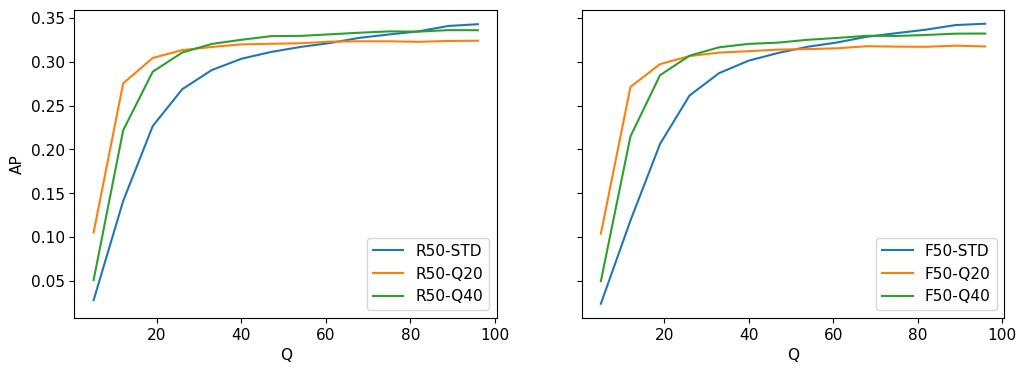

In [13]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
for ax, m in zip(axes, "RF"):
    for model in (f"{m}50-STD", f"{m}50-Q20", f"{m}50-Q40"):
        s.plot_AP(model, ax=ax, i18n=i18n)
save_plot(fig, "15-trained-AP-curves-AP-Q", c=c)

In [14]:
for m in "RF":
    compare3ap(s, f"{m}50-STD", f"{m}50-Q20", f"{m}50-Q40")

,R50-STD,R50-Q20,R50-Q40
R50-STD,None,R50-Q20 over R50-STD: AP advantagequality 5 0.105197 0.07722512 0.275350 0.13419419 0.304351 0.07769526 0.313310 0.04459833 0.316884 0.02629740 0.319819 0.01639147 0.320521 0.00935454 0.321117 0.00420461 0.322934 0.001531,R50-Q40 over R50-STD: AP advantagequality 5 0.050973 0.02300212 0.221789 0.08063319 0.288645 0.06198926 0.310573 0.04186133 0.320380 0.02979340 0.325084 0.02165547 0.329217 0.01805054 0.329520 0.01260761 0.331316 0.00991268 0.333163 0.00584875 0.334666 0.003469
R50-Q20,R50-STD over R50-Q20: AP advantagequality 68 0.327315 0.00395775 0.331196 0.00787082 0.334752 0.01198089 0.340862 0.01713096 0.342822 0.018828,None,R50-Q40 over R50-Q20: AP advantagequality 33 0.320380 0.00349640 0.325084 0.00526447 0.329217 0.00869654 0.329520 0.00840361 0.331316 0.00838268 0.333163 0.00980575 0.334666 0.01133982 0.334397 0.01162589 0.336087 0.01235696 0.335993 0.011999
R50-Q40,R50-STD over R50-Q40: AP advantagequality 82 0.334752 0.00035589 0.340862 0.00477496 0.342822 0.006829,R50-Q20 over R50-Q40: AP advantagequality 5 0.105197 0.05422412 0.275350 0.05356119 0.304351 0.01570626 0.313310 0.002737,None


,F50-STD,F50-Q20,F50-Q40
F50-STD,None,F50-Q20 over F50-STD: AP advantagequality 5 0.103854 0.07992912 0.271244 0.15242119 0.297289 0.09114426 0.306502 0.04495733 0.310478 0.02342640 0.312070 0.01082347 0.313879 0.003801,F50-Q40 over F50-STD: AP advantagequality 5 0.049737 0.02581212 0.214800 0.09597719 0.284636 0.07849126 0.306912 0.04536633 0.316502 0.02944940 0.320398 0.01915147 0.321857 0.01177954 0.325071 0.00791861 0.327209 0.00514468 0.329618 0.001054
F50-Q20,F50-STD over F50-Q20: AP advantagequality 54 0.317153 0.00270061 0.322065 0.00669168 0.328564 0.01081975 0.332633 0.01535682 0.336637 0.01958489 0.341875 0.02351196 0.343403 0.025971,None,F50-Q40 over F50-Q20: AP advantagequality 26 0.306912 0.00040933 0.316502 0.00602440 0.320398 0.00832847 0.321857 0.00797854 0.325071 0.01061861 0.327209 0.01183568 0.329618 0.01187475 0.329428 0.01215182 0.330574 0.01352289 0.332073 0.01370996 0.332178 0.014745
F50-Q40,F50-STD over F50-Q40: AP advantagequality 75 0.332633 0.00320482 0.336637 0.00606389 0.341875 0.00980296 0.343403 0.011226,F50-Q20 over F50-Q40: AP advantagequality 5 0.103854 0.05411612 0.271244 0.05644419 0.297289 0.012653,None


# AP -- fine tuned

Saved 15-trained-AP-curves-AP-T.png


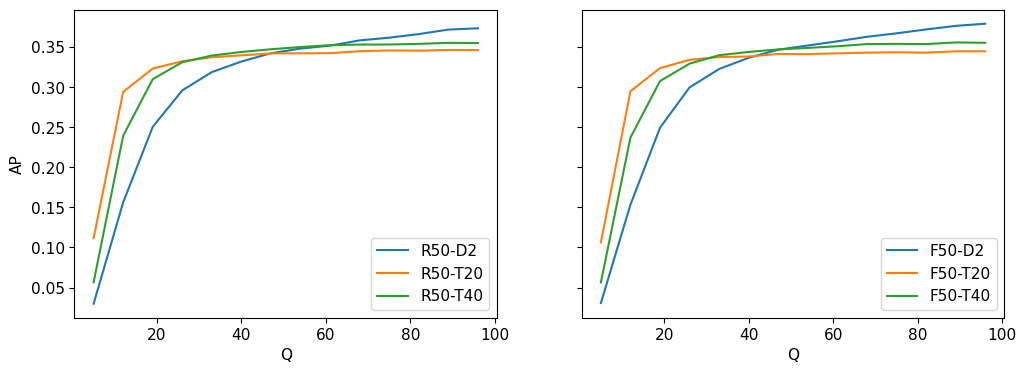

In [15]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
for ax, m in zip(axes, "RF"):
    for model in (f"{m}50-D2", f"{m}50-T20", f"{m}50-T40"):
        s.plot_AP(model, ax=ax, i18n=i18n)
save_plot(fig, "15-trained-AP-curves-AP-T", c=c)

In [16]:
for m in "RF":
    compare3ap(s, f"{m}50-D2", f"{m}50-T20", f"{m}50-T40")

,R50-D2,R50-T20,R50-T40
R50-D2,None,R50-T20 over R50-D2: AP advantagequality 5 0.111518 0.08169112 0.294225 0.13788819 0.323319 0.07270826 0.332436 0.03629733 0.337477 0.01855540 0.339837 0.007697,R50-T40 over R50-D2: AP advantagequality 5 0.056613 0.02678612 0.239475 0.08313819 0.310139 0.05952726 0.331240 0.03510133 0.339605 0.02068340 0.344047 0.01190747 0.347447 0.00496154 0.350224 0.00199261 0.352493 0.000518
R50-T20,R50-D2 over R50-T20: AP advantagequality 47 0.342486 0.00030154 0.348231 0.00584061 0.351975 0.00942168 0.358498 0.01347575 0.361871 0.01595182 0.366368 0.02075489 0.371967 0.02541996 0.373606 0.027169,None,R50-T40 over R50-T20: AP advantagequality 33 0.339605 0.00212840 0.344047 0.00421047 0.347447 0.00526254 0.350224 0.00783261 0.352493 0.00993968 0.353282 0.00826075 0.353370 0.00745082 0.354182 0.00856789 0.355407 0.00885996 0.355194 0.008757
R50-T40,R50-D2 over R50-T40: AP advantagequality 68 0.358498 0.00521575 0.361871 0.00850182 0.366368 0.01218689 0.371967 0.01656096 0.373606 0.018413,R50-T20 over R50-T40: AP advantagequality 5 0.111518 0.05490512 0.294225 0.05474919 0.323319 0.01318126 0.332436 0.001196,None


,F50-D2,F50-T20,F50-T40
F50-D2,None,F50-T20 over F50-D2: AP advantagequality 5 0.106323 0.07563112 0.295025 0.14160219 0.323858 0.07437826 0.334261 0.03441133 0.337672 0.01489040 0.338373 0.001564,F50-T40 over F50-D2: AP advantagequality 5 0.056438 0.02574712 0.237196 0.08377419 0.307711 0.05823126 0.329497 0.02964733 0.339976 0.01719340 0.344099 0.00729047 0.347219 0.000345
F50-T20,F50-D2 over F50-T20: AP advantagequality 47 0.346874 0.00529854 0.352136 0.01079061 0.357330 0.01499168 0.362986 0.01975775 0.367309 0.02362082 0.372159 0.02899489 0.376607 0.03174896 0.379298 0.034424,None,F50-T40 over F50-T20: AP advantagequality 33 0.339976 0.00230440 0.344099 0.00572647 0.347219 0.00564354 0.349125 0.00778061 0.351170 0.00883068 0.353905 0.01067675 0.354147 0.01045882 0.353890 0.01072589 0.355937 0.01107996 0.355509 0.010636
F50-T40,F50-D2 over F50-T40: AP advantagequality 54 0.352136 0.00301061 0.357330 0.00616168 0.362986 0.00908175 0.367309 0.01316282 0.372159 0.01826989 0.376607 0.02067096 0.379298 0.023788,F50-T20 over F50-T40: AP advantagequality 5 0.106323 0.04988412 0.295025 0.05782919 0.323858 0.01614726 0.334261 0.004764,None
